<a href="https://colab.research.google.com/github/pireylow/LSTM-keras-stock-price-prediction/blob/main/Exit_Price_Below_Slow_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


In [2]:
#import necessary modules
import random
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [3]:
#set stock information
ticker = 'TSLA'
startdate = '2015-01-01'
enddate = '2021-12-01'

start = pd.to_datetime(startdate)
end = pd.to_datetime(enddate)
sdata = pdr.get_data_yahoo(ticker, start=start, end=end)

columnsTitles=['Open','High','Low','Close','Volume','Adj Close']
sdata=sdata.reindex(columns=columnsTitles)

[*********************100%***********************]  1 of 1 completed


In [4]:
close=sdata['Close']
close.describe()

count    1741.000000
mean       60.343151
std        84.620327
min         9.578000
25%        15.489333
50%        20.468000
75%        45.266666
max       409.970001
Name: Close, dtype: float64

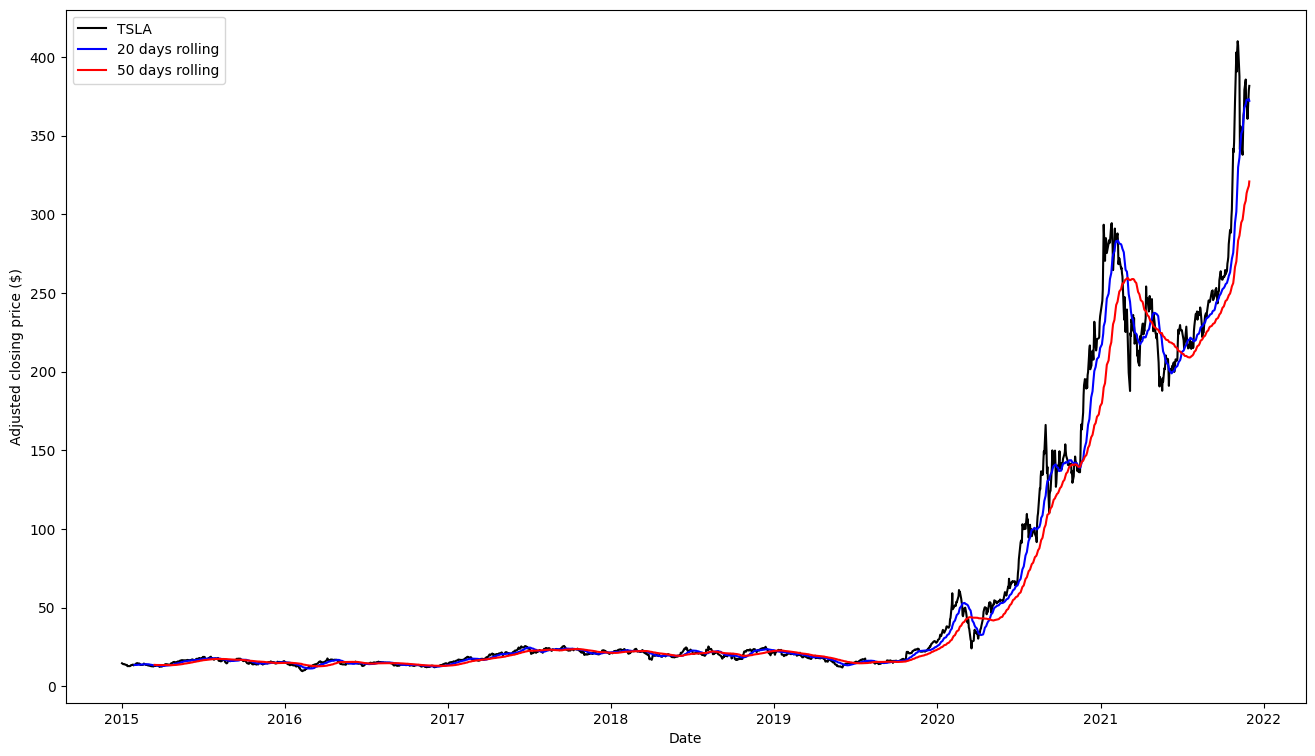

In [5]:
# Calculate the 20 and 50 days moving averages of the closing prices
short_rolling = close.rolling(window=20).mean()
long_rolling = close.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label='50 days rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()


50
153
197
261
344
421
557
642
701
797
806
898
926
1008
1165
1311
1478
1551
1603


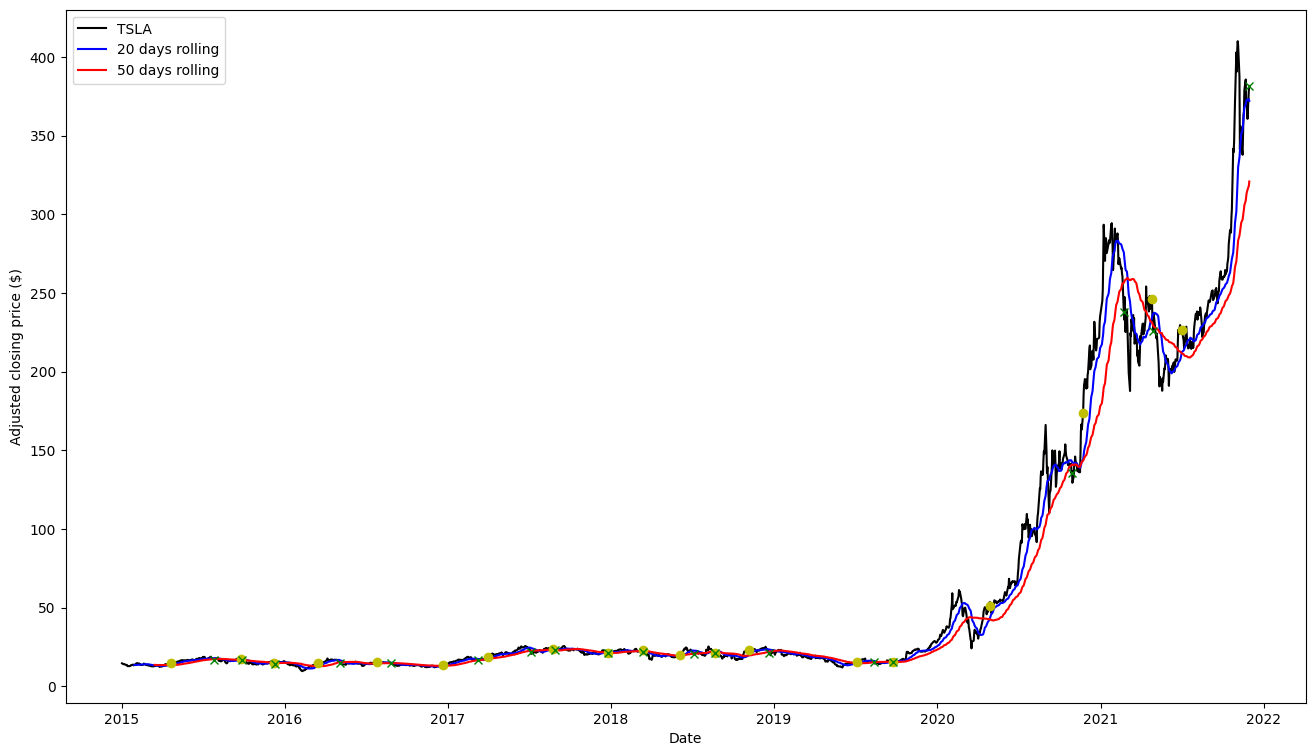

In [6]:

# Calculate the 20 and 50 days moving averages of the closing prices
"""
different exit rule -- when the price crosses below the slow MA
"""
fast_val = 20
slow_val = 50
short_rolling = close.rolling(window=fast_val).mean()
long_rolling = close.rolling(window=slow_val).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label='50 days rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

time_counter = 50
profit_list = [ ]
profit_info = [ ]
profit = 0
FF_loop_flag = True
while FF_loop_flag:

  #FF to first up cross and save the entry price
  FF_loop_flag = True
  print(time_counter)
  while FF_loop_flag and short_rolling[time_counter] <= long_rolling[time_counter]:
    time_counter += 1
    if time_counter >= len(short_rolling):
      FF_loop_flag = False
      time_counter -= 1
  entry_price = close[time_counter]
  profit_info.append(('entry', time_counter, entry_price))
  ax.plot(close.index[time_counter], entry_price, 'o', color = 'y')

  #FF to first up cross and save the exit price
  FF_loop_flag = True
  while FF_loop_flag and close[time_counter] >= long_rolling[time_counter]:
    time_counter += 1
    if time_counter >= len(close):
      FF_loop_flag = False
      time_counter -= 1
  exit_price = close[time_counter]
  profit = profit + (exit_price - entry_price)
  profit_info.append(('exit', time_counter, exit_price, exit_price - entry_price))
  profit_list.append(exit_price - entry_price)
  ax.plot(close.index[time_counter], exit_price, 'x', color = 'g')

  #FF to first MA down cross to set up for next buy signal
  FF_loop_flag = True
  while FF_loop_flag and short_rolling[time_counter] >= long_rolling[time_counter]:
      time_counter += 1
      if time_counter >= len(close):
        FF_loop_flag = False
        time_counter -= 1



In [7]:
time_counter

1740

In [8]:
profit_list

[2.23799991607666,
 -0.5653324127197266,
 -0.5,
 0.28133296966552734,
 -0.667999267578125,
 2.611332893371582,
 3.252666473388672,
 -0.4739990234375,
 0.0,
 -1.0139999389648438,
 0.8279991149902344,
 0.0,
 -1.7346668243408203,
 -0.27266693115234375,
 0.0,
 84.0653305053711,
 64.2166748046875,
 -20.399993896484375,
 155.2866668701172]

In [9]:
profit

287.1513452529907